# House Prices : Linear Regression

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Reading the dataset into a Pandas DataFrame.

In [2]:

df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [3]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2008,WD,Normal,147500


## 2 Data Preprocessing

### 2.1 Data Types and non-null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

### 2.2 Statistical Summary

In [5]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


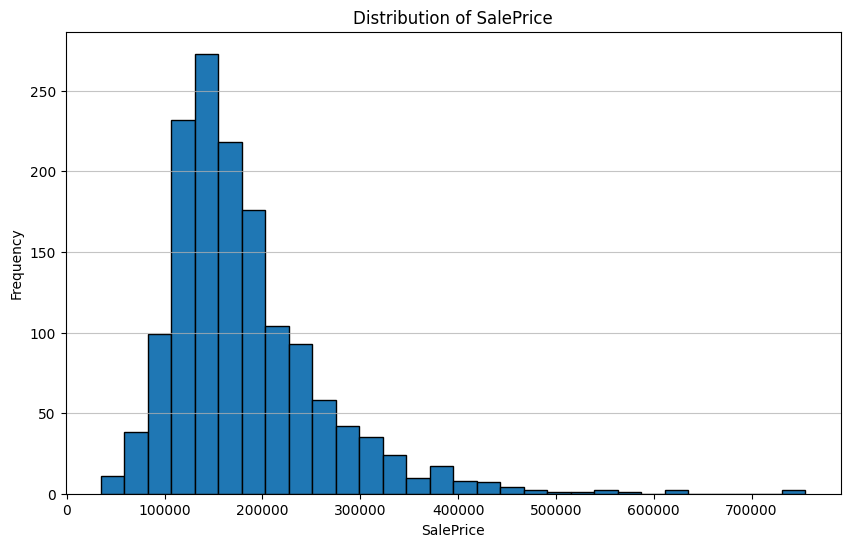

In [6]:
# Plotting the distribution of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [12]:
#List of Categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_vars)
#LotFrontage is a numerical variable, which contains 'NA' replacing by mean values 
df['LotFrontage'] = df['LotFrontage'].replace('NA', np.nan)
df['LotFrontage'] = df['LotFrontage'].astype(float)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df.head()

Categorical Variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


/tmp/ipykernel_106637/2609515672.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### 2.3 Handling Missing Values

In [15]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [20]:
#Numerical columns with missing values
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
missing_numerical_columns = [col for col in numerical_columns if df[col].isnull().any()]
print("Numerical columns with missing values:", missing_numerical_columns)

# OverallQuall and OverallCond has any 0 values
print("OverallQual unique values:", df['OverallQual'].unique())
print("OverallCond unique values:", df['OverallCond'].unique())
#Checking for 'NA' entry in features , NA and NaN are different
na_columns = df.columns[df.isin(['NA']).any()]
print("Columns with 'NA' entries:", na_columns.tolist())

Numerical columns with missing values: []
OverallQual unique values: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond unique values: [5 8 6 7 4 2 3 9 1]
Columns with 'NA' entries: ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [25]:
# Categorical columns with missing values
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
missing_categorical_columns = [col for col in categorical_columns if df[col].isnull().any()]
print("Categorical columns with missing values:", missing_categorical_columns)

Categorical columns with missing values: []


In [36]:
# Encoding categorical variables with One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[missing_categorical_columns])
print("Encoded Categorical Variables Shape:", encoded_categorical.shape)
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(missing_categorical_columns))
print("Encoded Categorical Variables:\n", encoded_df.head())
df = df.drop(missing_categorical_columns, axis=1)
df = pd.concat([df, encoded_df], axis=1)
df.head()

Encoded Categorical Variables Shape: (1460, 0)
Encoded Categorical Variables:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


## 3. Splitting the dataset
Divide the dataset into two sets using k-fold
cross validation technique entitled to train and test set respectively.

Train shape: (1168, 80), Test shape: (292, 80)
Train shape: (1168, 80), Test shape: (292, 80)
Train shape: (1168, 80), Test shape: (292, 80)
Train shape: (1168, 80), Test shape: (292, 80)
Train shape: (1168, 80), Test shape: (292, 80)


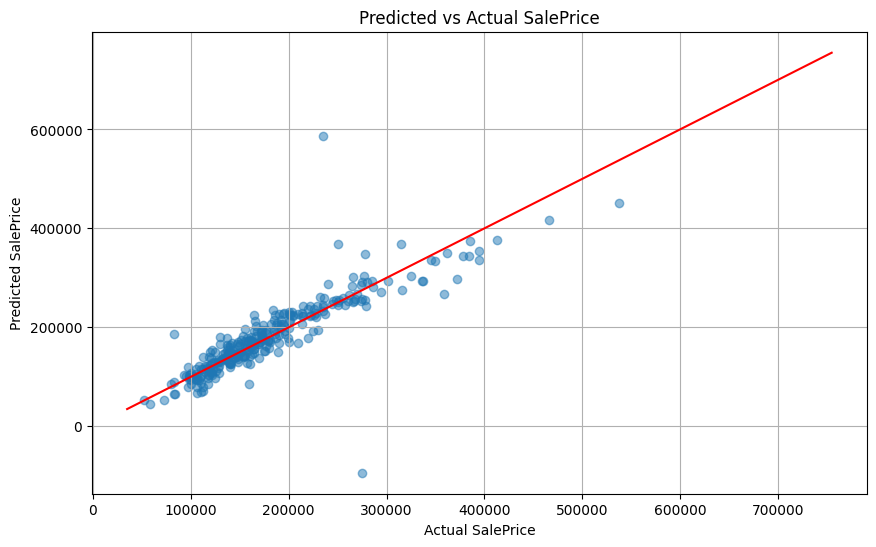

In [34]:
#K- fold cross validation
from sklearn.model_selection import KFold


X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Print the shapes of the splits
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

#Prediction of SalePrice from Test set
y_pred = model.predict(X_test)
# Plotting the predicted vs actual SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid()
plt.show()

Use the linear regression method to estimate the slope and intercept for predicting
“SalePrice” based on “LotArea”.

In [41]:
# Use the linear regression method to estimate the slope and intercept for predicting
# “SalePrice” based on “LotArea”.
X_m0 = df[['LotArea']]
y_m0 = df['SalePrice']

model = LinearRegression()
model.fit(X_m0, y_m0)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}, Intercept: {intercept}")
mse_m0 = mean_squared_error(y_m0, model.predict(X_m0))
r2_m0 = r2_score(y_m0, model.predict(X_m0))
print(f"Model 0 - MSE: {mse_m0}, R^2: {r2_m0}")

Slope: 2.0999719517076745, Intercept: 158836.1518968766
Model 0 - MSE: 5867752122.509075, R^2: 0.0696133153821118


Use the multiple regression method to estimate the value of the
weights/coefficients for predicting “SalePrice” based on the following features:
- a. Model 1: LotFrontage, LotArea
- b. Model 2: LotFrontage, LotArea, OverallQual, OverallCond
- c. Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF,
GrLivArea

In [42]:

# Use the multiple regression method to estimate the value of the
# weights/coefficients for predicting “SalePrice” based on the following features:
# - a. Model 1: LotFrontage, LotArea

X_m1 = df[['LotFrontage', 'LotArea']]
y_m1 = df['SalePrice']

model1 = LinearRegression()
model1.fit(X_m1, y_m1)
slope_m1 = model1.coef_
intercept_m1 = model1.intercept_
mse_m1 = mean_squared_error(y_m1, model1.predict(X_m1))
r2_m1 = r2_score(y_m1, model1.predict(X_m1))
print(f"Model 1 - MSE: {mse_m1}, R^2: {r2_m1}")

print(f"Model 1 Slope: {slope_m1}, Intercept: {intercept_m1}")
# - b. Model 2: LotFrontage, LotArea, OverallQual, OverallCond
X_m2 = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']]
y_m2 = df['SalePrice']

model2 = LinearRegression()
model2.fit(X_m2, y_m2)
slope_m2 = model2.coef_
intercept_m2 = model2.intercept_
mse_m2 = mean_squared_error(y_m2, model2.predict(X_m2))
r2_m2 = r2_score(y_m2, model2.predict(X_m2))
print(f"Model 2 - MSE: {mse_m2}, R^2: {r2_m2}")
print(f"Model 2 Slope: {slope_m2}, Intercept: {intercept_m2}")

# - c. Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea
X_m3 = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']]
y_m3 = df['SalePrice']
model3 = LinearRegression()
model3.fit(X_m3, y_m3)
slope_m3 = model3.coef_
intercept_m3 = model3.intercept_
mse_m3 = mean_squared_error(y_m3, model3.predict(X_m3))
r2_m3 = r2_score(y_m3, model3.predict(X_m3))
print(f"Model 3 - MSE: {mse_m3}, R^2: {r2_m3}")
print(f"Model 3 Slope: {slope_m3}, Intercept: {intercept_m3}")

Model 1 - MSE: 5418745237.718428, R^2: 0.14080753391572387
Model 1 Slope: [1011.21616339    1.41542572], Intercept: 95199.75677006671
Model 2 - MSE: 2083459115.5910046, R^2: 0.669648175549932
Model 2 Slope: [ 4.09642952e+02  1.19237584e+00  4.29857990e+04 -1.58285496e+02], Intercept: -121615.7234163263
Model 3 - MSE: 1608711926.4513323, R^2: 0.7449237587909038
Model 3 Slope: [5.82711595e+01 6.45767694e-01 3.11577531e+04 1.34537716e+03
 3.47233470e+01 4.01424552e+01], Intercept: -128698.74025594143
